In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [2]:
data = pd.read_csv('./data/after_clean.csv', index_col=None, encoding = 'utf_8_sig')
data_2019 = pd.read_csv('./data/after_clean_2019.csv', index_col=None, encoding = 'utf_8_sig')
data_2019_1_4 = pd.read_csv('./data/after_clean_2019_1_4.csv', index_col=None, encoding = 'utf_8_sig')

In [3]:
test = pd.read_csv('./data/after_clean.csv', index_col=None, encoding = 'utf_8_sig')
#test.isnull().sum()

In [4]:
#data = data[~data['OrderTime'].isna()]
data_2019[data_2019['Cell'].isna()]['Cell'] = 'No'
data_2019_com = pd.concat([data_2019.loc[:,data_2019_1_4.columns], data_2019_1_4], ignore_index=True)

In [5]:
data_2019_com[data_2019_com['OrderID'].duplicated()]

,OrderID,MemberName,AlipayAccount,OwnedAmount,DeliveryFee,PointsPaid,Total,PointsEarned,DirectPay,PointsPay,OrderStatus,BuyerMessage,ReceiverName,ReceivingAdd,DeliverMethod,CellPhone,OrderTime,PaytTime,ItemName,ItemCate,DeliverCompany,OrderNote,OrderItemNo,DeliveredTime,StoreReceived,CunTaoOrder,Province,City,OrderYear,OrderMonth,OrderToPay(s),PayToReceive(h)


In [6]:
data.columns

Index(['OrderID', 'MemberName', 'AlipayAccount', 'OwnedAmount', 'DeliveryFee',
       'PointsPaid', 'Total', 'PointsEarned', 'DirectPay', 'PointsPay',
       'OrderStatus', 'BuyerMessage', 'ReceiverName', 'ReceivingAdd',
       'DeliverMethod', 'CellPhone', 'OrderTime', 'PaytTime', 'ItemName',
       'ItemCate', 'DeliverCompany', 'OrderNote', 'OrderItemNo',
       'DeliveredTime', 'StoreReceived', 'CunTaoOrder', 'Province', 'City',
       'OrderYear', 'OrderMonth', 'OrderToPay(s)', 'PayToReceive(h)'],
      dtype='object')

## Order Bi_hour Distribution

In [7]:
timestamps = pd.to_datetime(data['OrderTime'])
timestamps_2019 = pd.to_datetime(data_2019['OrderTime'])
timestamps_2019_cell = pd.to_datetime(data_2019['OrderTime'][data_2019['Cell']=='手机订单'])

In [8]:
data_2019['Cell'].value_counts()

手机订单    2031
No       143
Name: Cell, dtype: int64

In [9]:
timeWindows = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12am', '12pm-2pm', '2pm-4pm', '4pm-6pm',
               '6pm-8pm', '8pm-10pm', '10pm-12am']
def RoundHours(time):
    if type(time) == pd._libs.tslibs.nattype.NaTType: return np.nan
    t = time.timetuple()
    hour = (t.tm_hour + (t.tm_min>0)) % 24
    return timeWindows[hour//2]
    

mappedTimeWindows = timestamps.map(RoundHours)
mappedTimeWindows_2019 = timestamps_2019.map(RoundHours)
mappedTimeWindows_2019_cell = timestamps_2019_cell.map(RoundHours)

In [10]:
x = mappedTimeWindows.dropna()
visitor_count = pd.DataFrame({'TimeWindow':x, 'Count':np.ones_like(x)}).groupby('TimeWindow').count()
visitor_count = visitor_count.sort_values('Count', ascending=False).reset_index()

x_2019 = mappedTimeWindows_2019.dropna()
visitor_count_2019 = pd.DataFrame({'TimeWindow':x_2019, 'Count':np.ones_like(x_2019)}).groupby('TimeWindow').count()
visitor_count_2019 = visitor_count_2019.sort_values('Count', ascending=False).reset_index()

x_2019_cell = mappedTimeWindows_2019_cell.dropna()
visitor_count_2019_cell = pd.DataFrame({'TimeWindow':x_2019_cell, 'Count':np.ones_like(x_2019_cell)}).groupby('TimeWindow').count()
visitor_count_2019_cell = visitor_count_2019_cell.sort_values('Count', ascending=False).reset_index()


In [11]:
visitor_count_2019

,TimeWindow,Count
0,10am-12am,290
1,4pm-6pm,284
2,10pm-12am,281
3,2pm-4pm,267
4,12pm-2pm,264
5,8pm-10pm,251
6,6pm-8pm,245
7,8am-10am,125
8,12am-2am,114
9,6am-8am,26


Text(0,0.5,'Time Window')

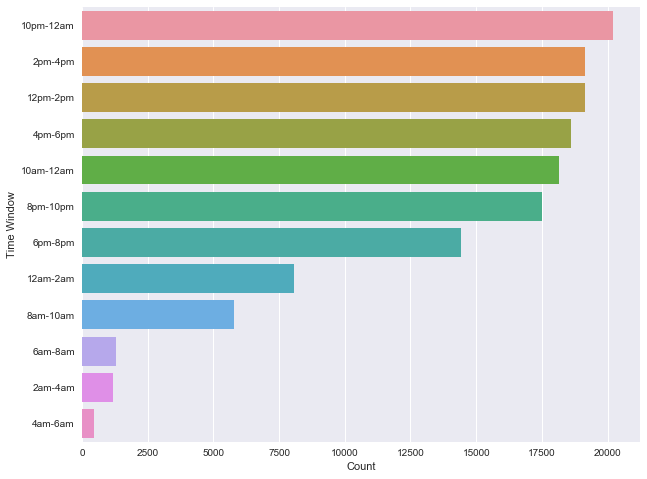

In [104]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
ax = sns.barplot(y='TimeWindow', x='Count', data=visitor_count)
ax.set_ylabel('Time Window')

** Conclusion drawn on 2010~2019 all orders**

- Includes both success orders and closed orders
        - The most orders created during dinner time **6pm-8pm**
        - Follows by the lunch break: **12pm-2pm
        - 88.4% of sucess orders and closed orders were created in the time window **6pm-12am**.
- It is reasonable to consider **6pm-8pm** as the major Social Media Advertisment time window.

Text(0,0.5,'Time Window')

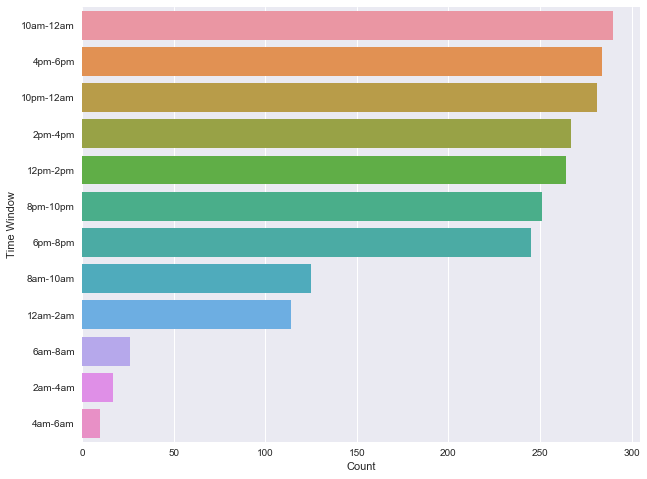

In [13]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='TimeWindow', x='Count', data=visitor_count_2019)
ax.set_ylabel('Time Window')

** Conclusion drawn on 2019 all orders**

- Dataset: 2019:(success orders)
        - The most orders created during dinner time **6pm-8pm**
        - Follows by the lunch break: **12pm-2pm
- Social Media Advertisment should be considered as **6pm-12am** 

Text(0,0.5,'Time Window')

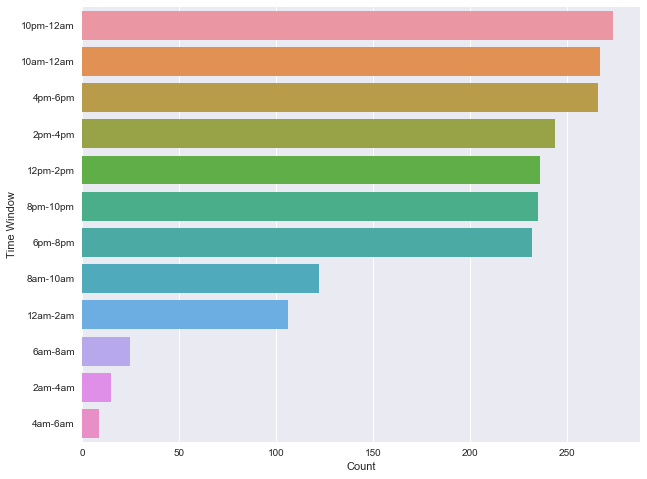

In [14]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='TimeWindow', x='Count', data=visitor_count_2019_cell)
ax.set_ylabel('Time Window')

In [15]:
(len(data_2019[data_2019['Cell']=='手机订单'])/data_2019.shape[0])*100

93.42226310947562

** Conclusion drawn on 2019 CELL PHONE orders**

- Oberservation:
        - in 2019, 93.5% of orders are generated on cell phone
        - 37% of the orders were created from **6pm-12am**
        - The most orders created during dinner time **10pm-12pm**
        - Follows by 6pm-8pm. the lunch break: **12pm-2pm

- There is a clear message: more and more customers are using cell phone order products. Order time is almost evenly spread out from 10am-12am(mid-night)

In [16]:
data['OrderMonth'].isna()
data = data[~data['OrderMonth'].isna()]

## Order Weekly Distribution

In [17]:
import calendar
data['OrderTime'] = pd.to_datetime(data['OrderTime'])
data['OrderYear'] = pd.to_datetime(data['OrderTime']).dt.year
data['OrderMonth'] = pd.to_datetime(data['OrderTime']).dt.month
data['OrderDate'] = pd.to_datetime(data['OrderTime']).dt.date
data['OrderWeekDay'] = pd.to_datetime(data['OrderTime']).dt.day_name()
data['YearMonth'] = pd.to_datetime(data['OrderTime']).dt.to_period('M')

data['OrderMonth'] = data['OrderMonth'].apply(lambda x: calendar.month_abbr[int(x)])
# import calendar
# df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [18]:
weekday_df = data.groupby(['OrderWeekDay']).agg({'Total':'sum', 'OrderID': 'count'}).reset_index()
weekday_df = weekday_df.sort_values(by = 'OrderID', ascending=False)

Text(0,0.5,'Order Number')

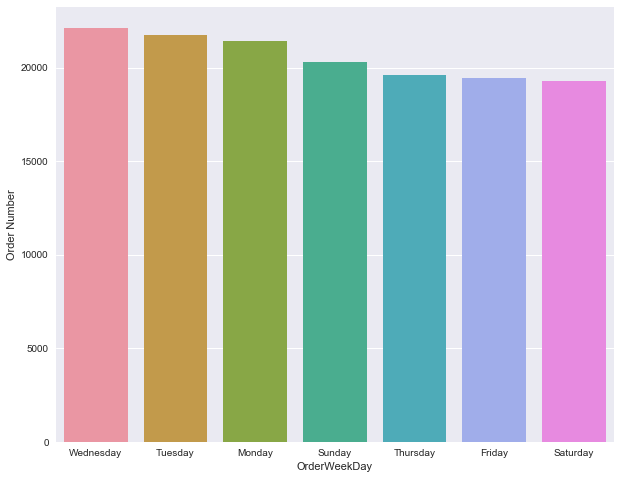

In [19]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='OrderID', x='OrderWeekDay', data=weekday_df)
ax.set_ylabel('Order Number')

**Wendsday and Tuesday have slice higher orders comparing the other days.**

In [34]:
data_2019['OrderTime'] = pd.to_datetime(data_2019['OrderTime'])
data_2019['OrderYear'] = pd.to_datetime(data_2019['OrderTime']).dt.year
data_2019['OrderMonth'] = pd.to_datetime(data_2019['OrderTime']).dt.month
data_2019['OrderDate'] = pd.to_datetime(data_2019['OrderTime']).dt.date
data_2019['OrderWeekDay'] = pd.to_datetime(data_2019['OrderTime']).dt.day_name()
data_2019['YearMonth'] = pd.to_datetime(data_2019['OrderTime']).dt.to_period('M')

data_2019['OrderMonth'] = data_2019['OrderMonth'].apply(lambda x: calendar.month_abbr[int(x)])

In [35]:
weekday_df_2019 = data_2019.groupby(['OrderWeekDay']).agg({'Total':'sum', 'OrderID': 'count'}).reset_index()
weekday_df_2019 = weekday_df_2019.sort_values(by = 'OrderID', ascending=False)

Text(0,0.5,'Order Number')

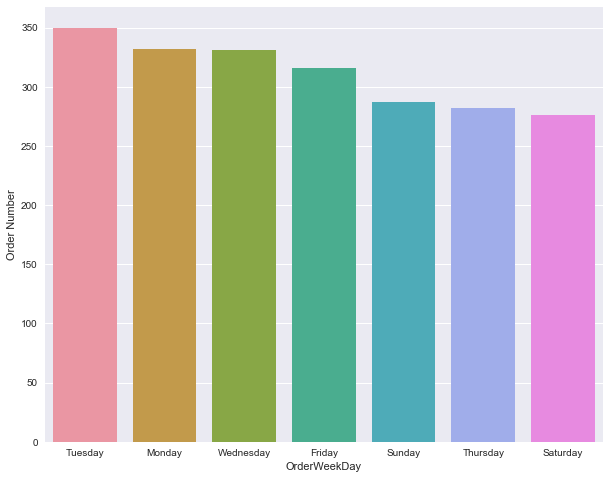

In [36]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='OrderID', x='OrderWeekDay', data=weekday_df_2019)
ax.set_ylabel('Order Number')

**Tuesday has slice higher orders comparing the other days.**

## Order Monthly Distribution

In [37]:
month_df = data.groupby(['OrderMonth']).agg({'Total':'sum', 'OrderID': 'count'}).reset_index()
month_df = month_df.sort_values(by = 'OrderID', ascending=False)

Text(0,0.5,'Order Number')

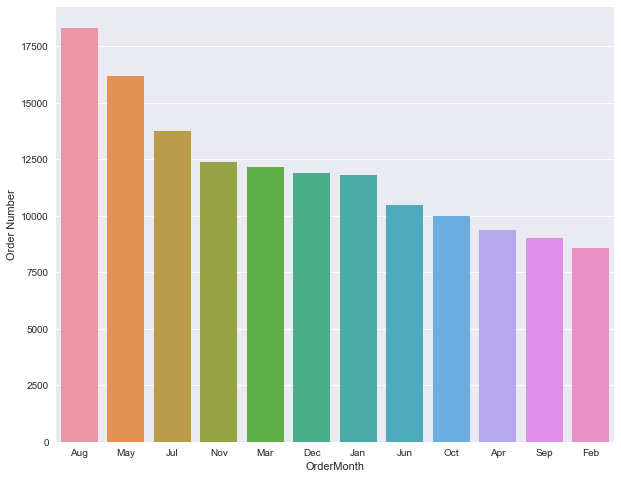

In [38]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='OrderID', x='OrderMonth', data=month_df)
ax.set_ylabel('Order Number')

In [46]:
month_df_2019_com = data_2019_com.groupby(['OrderMonth']).agg({'Total':'sum', 'OrderID': 'count'}).reset_index()
month_df_2019_com = month_df_2019_com.sort_values(by = 'OrderID', ascending=False)

month_df_2019_com['OrderMonth'] = month_df_2019_com['OrderMonth'].apply(lambda x: calendar.month_abbr[int(x)])

In [47]:
month_df_2019_com.head()

,OrderMonth,Total,OrderID
1,Feb,179277.69,1292
2,Mar,169920.91,1079
0,Jan,163141.00,960
3,Apr,133188.95,887
6,Jul,112202.69,776


Text(0,0.5,'Order Number')

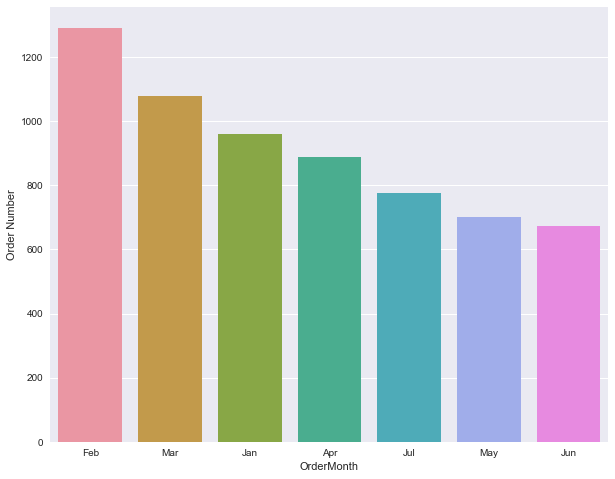

In [48]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='OrderID', x='OrderMonth', data=month_df_2019_com)
ax.set_ylabel('Order Number')

## NOTE
1. create a pivot table to show different products? over different months(index)?
2. maybe i can create a score list on the products. line 66 ?
3. line 59:  time series -- use smooth avg line to show the trend , avoid the pointing line shape.

In [49]:
type(data['OrderTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
data[data['OrderTime']==0]

,OrderID,MemberName,AlipayAccount,OwnedAmount,DeliveryFee,PointsPaid,Total,PointsEarned,DirectPay,PointsPay,OrderStatus,BuyerMessage,ReceiverName,ReceivingAdd,DeliverMethod,CellPhone,OrderTime,PaytTime,ItemName,ItemCate,DeliverCompany,OrderNote,OrderItemNo,DeliveredTime,StoreReceived,CunTaoOrder,Province,City,OrderYear,OrderMonth,OrderToPay(s),PayToReceive(h),OrderDate,OrderWeekDay,YearMonth


In [51]:
data.dtypes

OrderID                    object
MemberName                 object
AlipayAccount              object
OwnedAmount               float64
DeliveryFee               float64
PointsPaid                  int64
Total                     float64
PointsEarned                int64
DirectPay                 float64
PointsPay                   int64
OrderStatus                object
BuyerMessage               object
ReceiverName               object
ReceivingAdd               object
DeliverMethod              object
CellPhone                  object
OrderTime          datetime64[ns]
PaytTime                   object
ItemName                   object
ItemCate                    int64
DeliverCompany             object
OrderNote                  object
OrderItemNo                 int64
DeliveredTime              object
StoreReceived              object
CunTaoOrder                object
Province                   object
City                       object
OrderYear                   int64
OrderMonth    

# Time elapse between Order placement and payment

In [52]:
data['PaytTime'] = pd.to_datetime(data['PaytTime'])

In [53]:
time_order_to_pay = list(map(lambda a, b:b-a, data['OrderTime'][:2], data['PaytTime'][:2]))

In [54]:
pd.Series(time_order_to_pay).describe()

count                         2
mean     0 days 00:00:19.500000
std      0 days 00:00:10.606601
min             0 days 00:00:12
25%      0 days 00:00:15.750000
50%      0 days 00:00:19.500000
75%      0 days 00:00:23.250000
max             0 days 00:00:27
dtype: object

**The average time from placing order to making payment is 19.5 seconds. **

# Customer Return Distribution

In [55]:
return_cust = data.groupby('AlipayAccount').agg({'Total':'sum', 'ItemName': 'count'}).reset_index()
return_cust = return_cust.sort_values(by = 'ItemName', ascending=False).rename(columns={'AlipayAccount':'AlipayAccount', 'Total':'TotalPurchase','ItemName':'Count'})

In [56]:
return_dist = return_cust.groupby('Count').count().reset_index().iloc[:,[0,1]].rename(columns={'Count':'PurchaseTimes', 'AlipayAccount':'Count'})
return_dist['Percentage'] = (return_dist['Count']/return_dist['Count'].sum())*100
return_dist

,PurchaseTimes,Count,Percentage
0,1,99337,84.407794
1,2,13761,11.692880
2,3,3041,2.583973
3,4,859,0.729902
4,5,351,0.298249
5,6,146,0.124058
6,7,74,0.062879
7,8,38,0.032289
8,9,16,0.013595
9,10,22,0.018694


Text(0,0.5,'Customer Return Distribution')

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

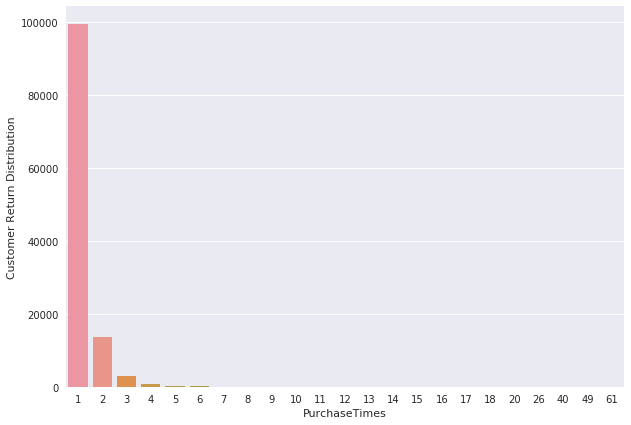

In [103]:
plt.figure(figsize=[10,7])
x=return_dist['PurchaseTimes']
y= return_dist['Count']

ax = sns.barplot(y=y, x=x, data=return_dist)
ax.set_ylabel('Customer Return Distribution')

In [58]:
len(data['AlipayAccount'].unique())

117687

In [59]:
print(f'Total unique customer accounts:', len(data['AlipayAccount'].unique()))
print(f'Total unique items:', len(data['ItemName'].unique()))
print(f'Total items sold:', data['OrderItemNo'].sum())

Total unique customer accounts: 117687
Total unique items: 8489
Total items sold: 213267


In [60]:
data.columns

Index(['OrderID', 'MemberName', 'AlipayAccount', 'OwnedAmount', 'DeliveryFee',
       'PointsPaid', 'Total', 'PointsEarned', 'DirectPay', 'PointsPay',
       'OrderStatus', 'BuyerMessage', 'ReceiverName', 'ReceivingAdd',
       'DeliverMethod', 'CellPhone', 'OrderTime', 'PaytTime', 'ItemName',
       'ItemCate', 'DeliverCompany', 'OrderNote', 'OrderItemNo',
       'DeliveredTime', 'StoreReceived', 'CunTaoOrder', 'Province', 'City',
       'OrderYear', 'OrderMonth', 'OrderToPay(s)', 'PayToReceive(h)',
       'OrderDate', 'OrderWeekDay', 'YearMonth'],
      dtype='object')

**Conlusion: ** 

- about **85% **of the customers left after placing the first order. 
- 114188 customer payment accounts accumulated through 2010-2019 
- 208,629 Item being ordered over 8439 placed orders
- Create tables of customer groups based on customer's purchase times)
- Set up group promotion policies
- Check customer's purchase history and 
- Approach customers through Email or phone call to bring them back.
- Followed by action records.

???
design vip system to encourage the customers to return. criteria : accumulated purchased ammount or times purchased.
top 10 percent customers will be classified as Silver Member.


## Yearly Sales Performance 
- Only successful transactions)

In [61]:
data.columns

Index(['OrderID', 'MemberName', 'AlipayAccount', 'OwnedAmount', 'DeliveryFee',
       'PointsPaid', 'Total', 'PointsEarned', 'DirectPay', 'PointsPay',
       'OrderStatus', 'BuyerMessage', 'ReceiverName', 'ReceivingAdd',
       'DeliverMethod', 'CellPhone', 'OrderTime', 'PaytTime', 'ItemName',
       'ItemCate', 'DeliverCompany', 'OrderNote', 'OrderItemNo',
       'DeliveredTime', 'StoreReceived', 'CunTaoOrder', 'Province', 'City',
       'OrderYear', 'OrderMonth', 'OrderToPay(s)', 'PayToReceive(h)',
       'OrderDate', 'OrderWeekDay', 'YearMonth'],
      dtype='object')

In [62]:
histry_df = data[data['OrderStatus']=='交易成功'][['YearMonth','Total','OrderItemNo']].set_index('YearMonth')

In [63]:
histry_df['Sums'] = histry_df.groupby('YearMonth')['Total'].sum()

In [102]:
histry_df['OrderItemNo'].sum()
histry_df['Total'].sum()

20704459.599999998

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


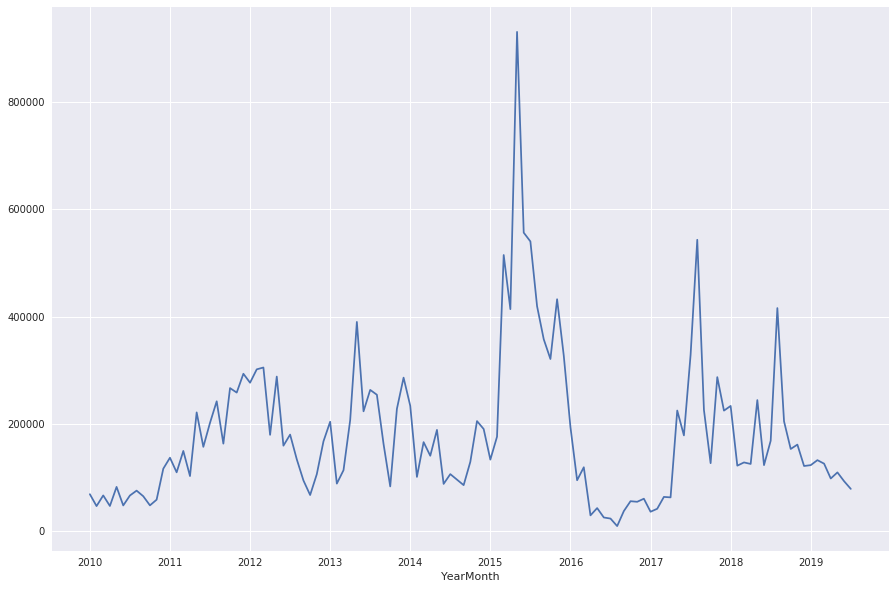

In [87]:
histry_df['Sums'].plot(figsize = (15,10))

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

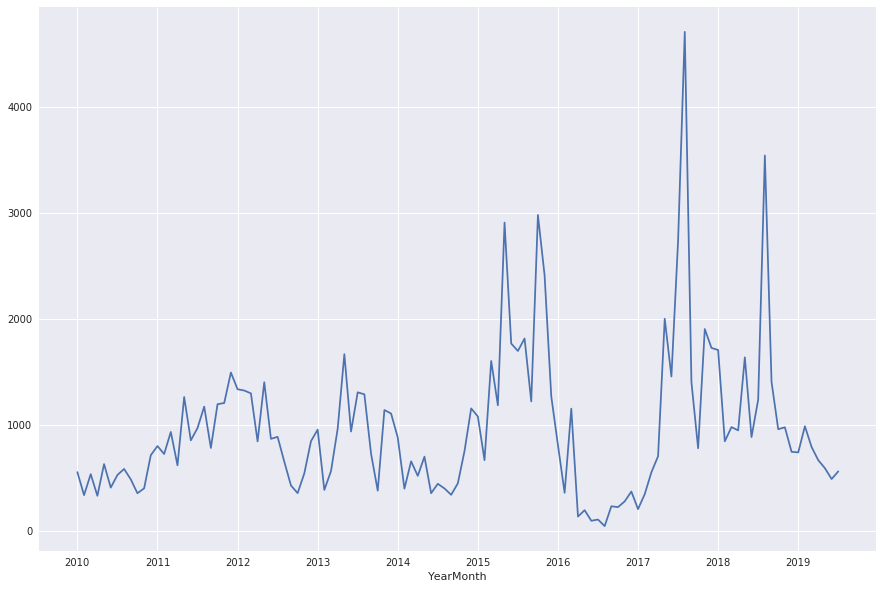

In [89]:
histry_df['Counts'] = histry_df.groupby('YearMonth')['OrderItemNo'].count()

No handles with labels found to put in legend.


/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

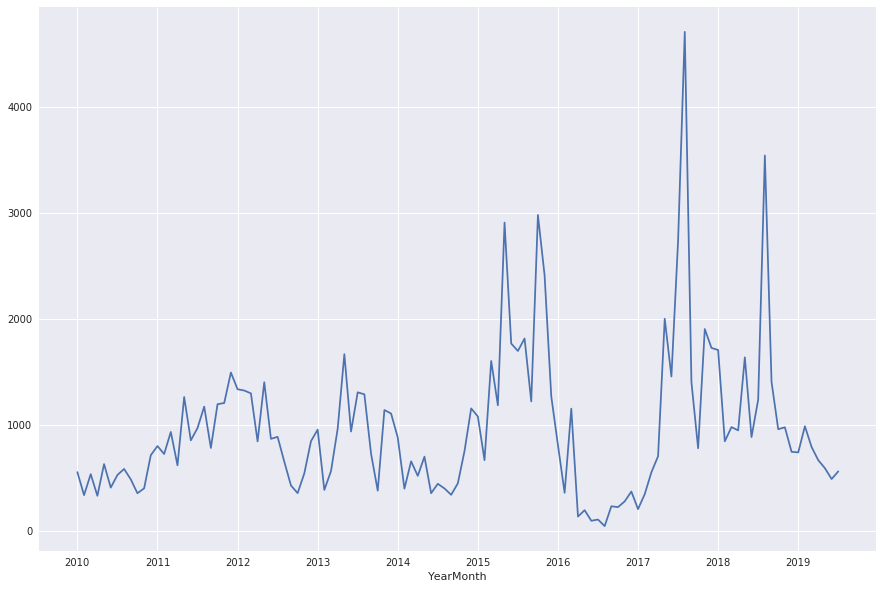

In [99]:
plt.figure(figsize=(15,7))
#plt.title('General Performance by Time',fontsize = 18)
#plt.plot( 'x', 'y1', data=histry_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',linewidth=4, label="Accumulated Sale")
plt.legend(loc='lower right',prop={'size':14})
histry_df['Counts'].plot(figsize = (15,10), label='Order Count by Time')

**from the above graph is the number of orders times series. It seems the total orders placed in 2017_2018 is quite high. But the total revenue performance was not very impressive. We have a reason to believe that the average product sales price is lower in this time period**

In [66]:
histry_df[(histry_df['Sums']>600000)]

,Total,OrderItemNo,Sums,Counts
YearMonth,,,,
2015-05,219.0,1,931566.6,2908
2015-05,256.0,1,931566.6,2908
2015-05,224.0,1,931566.6,2908
2015-05,299.0,1,931566.6,2908
2015-05,82.0,1,931566.6,2908
2015-05,708.0,2,931566.6,2908
2015-05,779.0,1,931566.6,2908
2015-05,256.0,1,931566.6,2908
2015-05,369.0,1,931566.6,2908


In [67]:
history_2015 = data[(data['OrderYear']==2015) & (data['OrderStatus']=='交易成功')]
history_2015.groupby('OrderMonth').agg({'Total':'sum'})

,Total
OrderMonth,
Apr,413735.90
Aug,419250.80
Dec,326880.00
Feb,175584.60
Jan,132753.00
Jul,540229.31
Jun,556651.90
Mar,514908.00
May,931566.60


In [68]:
history_2019 = data[(data['OrderYear']==2019) & (data['OrderStatus']=='交易成功')]
history_2019.groupby('OrderMonth').agg({'Total':'sum'})

,Total
OrderMonth,
Apr,97477.51
Feb,131753.55
Jan,122426.00
Jul,78085.90
Jun,92384.06
Mar,125221.89
May,108872.07


In [69]:
history_2019 = data_2019_com[(data_2019_com['OrderYear']==2019) & (data_2019_com['OrderStatus']=='交易成功')]
history_2019.groupby('OrderMonth').agg({'Total':'sum'})

,Total
OrderMonth,
1.0,123377.00
2.0,133403.55
3.0,127536.43
4.0,98265.63
5.0,108872.07
6.0,92384.06
7.0,78085.90


**Oberservation:**

- The best selling season each year falls in July.-September which reflects the summer vacation and school supply preparation for the Autumn semester.
- During the past 10 years, **2015 is the best selling year.** 
- The highest selling record fell into **May,2015 and reached $931,000 Therefore**
  research into this month is strongly recommended.
- The lowest selling year **2016**.
  Therefore, research into this month is also strongly recommended





## Reginal Sales Performance 
- Data only includes success transactions
- Top five regions: 江苏省	浙江省	上海市	山东省	广东省
- Top five province contribute to 53% of the total accumulated sales.

In [70]:
regional_df = data[data['OrderStatus']=='交易成功'].groupby('Province').agg({'Total':'sum','OrderItemNo':'count'}).sort_values('Total', ascending=False).reset_index()


Text(0.5,1,'Performance by Region')

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

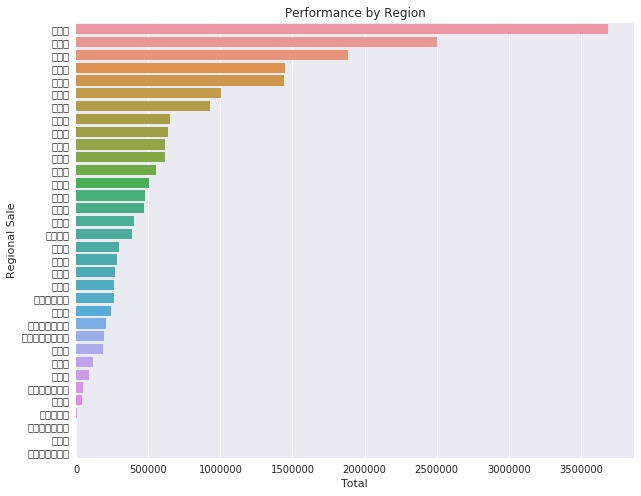

In [97]:
plt.figure(figsize=[10,8])
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False

ax = sns.barplot(y='Province', x='Total', data=regional_df)
ax.set_ylabel('Regional Sale', family='Kai')
ax.set_title('Performance by Region')

In [84]:
top_5_region = regional_df.head(5)

In [85]:
top_5_region

,Province,Total,OrderItemNo
0,江苏省,3686168.81,17099
1,浙江省,2501929.20,13145
2,上海市,1888514.36,9877
3,山东省,1449521.03,8033
4,广东省,1438415.73,8934


In [86]:
top_5_region['Total'].sum()/regional_df['Total'].sum()

0.5295742724915107

## Item Sales Performance 
- Analysis based success transactions
- 8400 items accumulated items through 10 years.
- Top 30 items contributes to 36.6% of the total sales

In [74]:
data['ItemName'] = data['ItemName'].apply(lambda s: 'No' if s== np.nan else s)

In [75]:
item_perform = data[(data['OrderStatus']=='交易成功')]
item_perform = item_perform.groupby('ItemName').agg({'Total':'sum','ItemName':'count'}).rename(columns = {'Total':'TotalSale','ItemName':'OrderCount'})

In [76]:
item_perform['Percentage'] = item_perform['TotalSale']/item_perform['TotalSale'].sum()
item_perform['AvePrice'] = item_perform['TotalSale']/item_perform['OrderCount']
item_perform = item_perform.sort_values('TotalSale', ascending=False)
top_30 = item_perform.head(30)

In [80]:
top_30 = top_30.reset_index()

Text(0,0.5,'Total Sale')

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

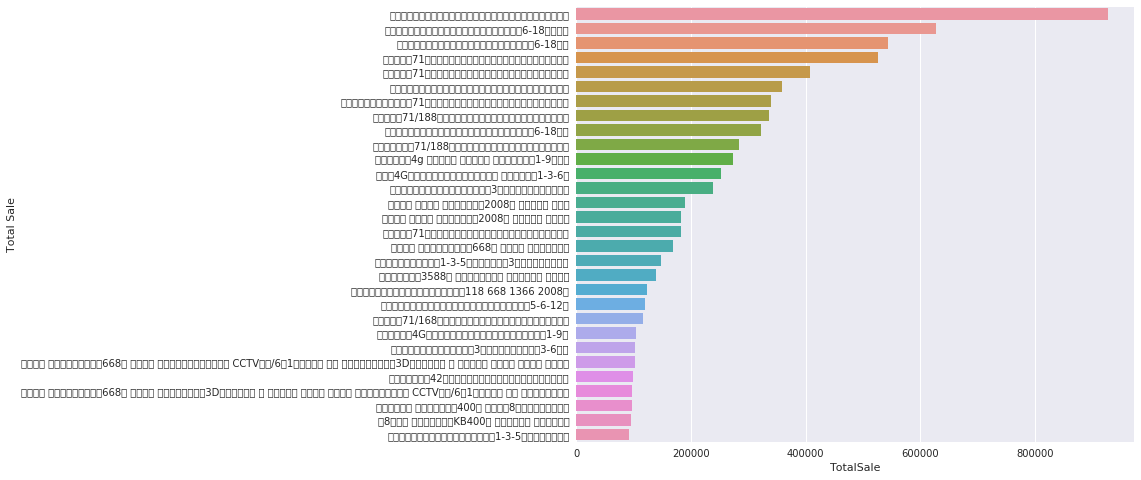

In [81]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='ItemName', x='TotalSale', data=top_30)
ax.set_ylabel('Total Sale', family='Kai')

Text(0,0.5,'Order Count')

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

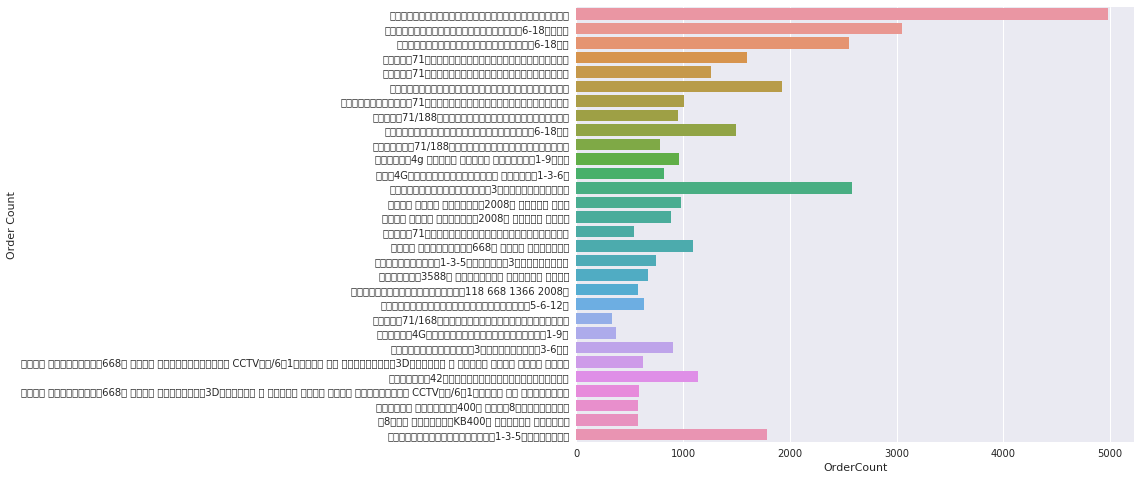

In [82]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='ItemName', x='OrderCount', data=top_30)
ax.set_ylabel('Order Count', family='Kai')

In [128]:
top_30['TotalSale'].sum()/item_perform['TotalSale'].sum()

0.3664851706634259

In [ ]:
item_perform_2019 = 

In [ ]:
crimes['Classification'] = crimes['Crime Subcategory'].map(lambda t:crimeMapper.get(t)) # dictionary.get(key)
crimes['Classification'] = crimes.Classification.map(lambda t:t if t else 'Missing')

In [ ]:
crimeType_counts = crimes.groupby('Classification')['Report Number'].count()
crimeType_counts.sort_values(ascending=False)

In [ ]:
nbd_class = crimes[['Neighborhood', 'Classification', 'Report Number']].groupby(['Neighborhood', 'Classification']).count()
nbd_class_table = nbd_class.reset_index().pivot(index='Neighborhood', columns='Classification', values='Report Number')

## NOTE
1. create a pivot table to show different products? over different months(index)?
2. maybe i can create a score list on the products. line 66 ?
3. line 59:  time series -- use smooth avg line to show the trend , avoid the pointing line shape.